# Praca domowa 1

Indywidualnie, zaimplementować model sieci neuronowej (MLP) do klasyfikacji w torch i przetestować go na dwóch zbiorach danych: XOR (wygenerować), oraz iris (pobrać).

## Wczytanie danych

In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

torch.manual_seed(1)
np.random.seed(1)

In [2]:
num_inputs = 3
X = np.random.normal(size=(1000, num_inputs))
for i in range(1000):
    if (X[i,1]>=0 and X[i,0]>=0) or (X[i,1]<0 and X[i,0]<0):
        X[i,2] = 0  
    else: 
        X[i,2] = 1

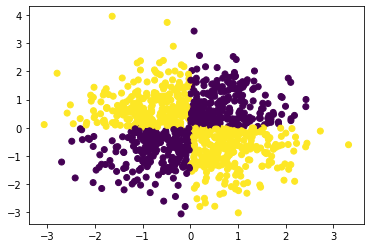

In [3]:
XOR = pd.DataFrame(X)
XOR.columns = ['a','b','c']
plt.scatter('a', 'b', c='c', data=XOR)
plt.show()

In [4]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Podział na próbkę treningową i testową

In [6]:
# Podział warstwowy według target
iris_train, iris_test = train_test_split(irisdf, test_size=0.3, random_state=42, stratify=irisdf['target'])
xor_train, xor_test = train_test_split(XOR, test_size=0.3, random_state=42, stratify=XOR['c'])

## Model do XOR

Model 1 - 2 warstwy po 10 neuronów

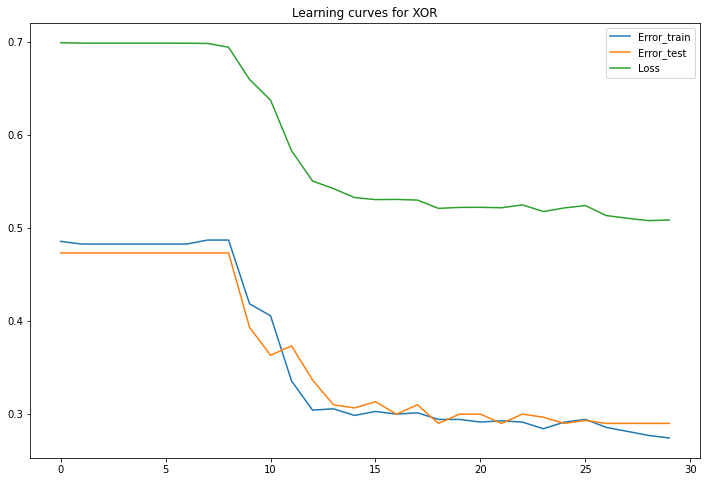

In [26]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10), # 2 kolumny, 10 neuronów x 2, 2 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(10, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_xor = torch.utils.data.DataLoader(np.array(xor_train), batch_size=1)
dataloader_test_xor = torch.utils.data.DataLoader(np.array(xor_test), batch_size=1)

num_iter = 30

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2] 
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2]
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for XOR")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Model 2 - 2 warstwy 4 neurony i 4 neurony

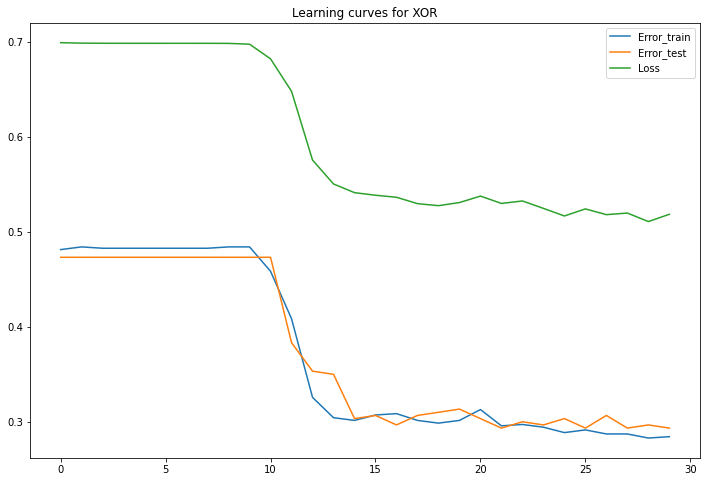

In [29]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), # 2 kolumny, 4 neurony, 4 neurony, 2 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(4, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 2)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_xor = torch.utils.data.DataLoader(np.array(xor_train), batch_size=1)
dataloader_test_xor = torch.utils.data.DataLoader(np.array(xor_test), batch_size=1)

num_iter = 30

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2] 
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2]
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for XOR")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Model 3 - 1 warstwa 10 neuronów

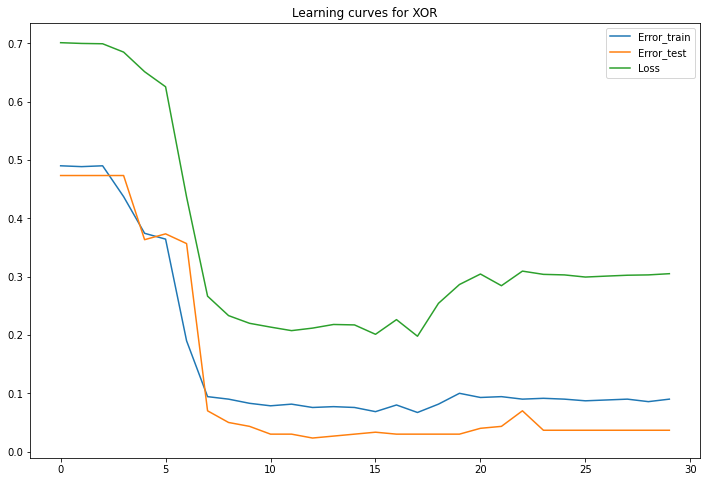

In [58]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10), # 2 kolumny, 10 neurony, 2 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_xor = torch.utils.data.DataLoader(np.array(xor_train), batch_size=1)
dataloader_test_xor = torch.utils.data.DataLoader(np.array(xor_test), batch_size=1)

num_iter = 30

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2] 
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2]
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for XOR")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Model 3 dał najlepszy wynik. Natomiast model 2 dał podobny rezultat co model 1 mimo znacznie mniejszej liczby neuronów. Nie zawsze dodanie 2. warstwy pozwoli na osiągnięcie lepszych rezultatów. Tak samo zwiększanie liczby neuronów do pewnego momentu poprawia działanie, a następnie pogarsza.

## Model do IRIS

Model 1 - 2 warstwy po 16 neuronów

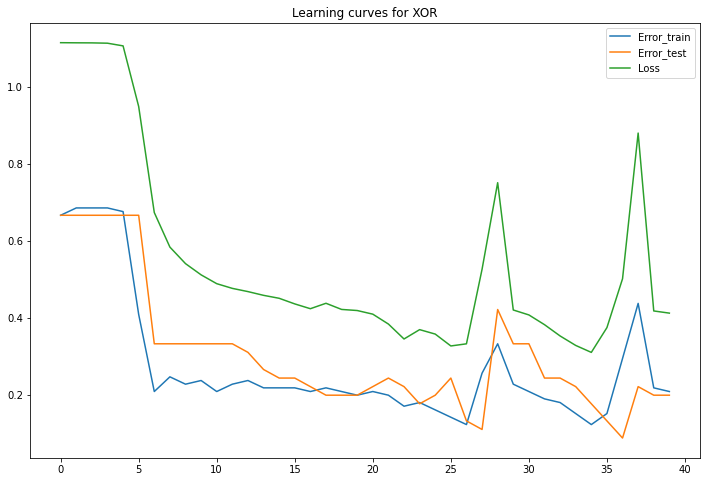

In [31]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów x 2, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 40

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Model 2 - 2 warstwy po 8 neuronów 

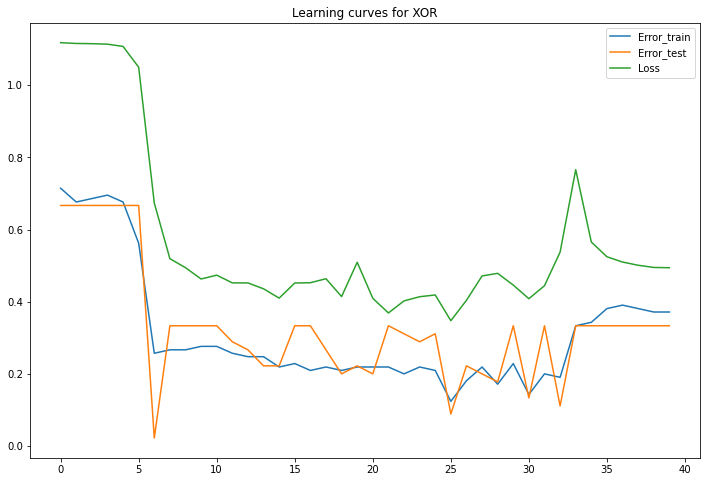

In [32]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 8), # 4 kolumny, 8 neuronów x 2, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(8, 8),
    torch.nn.ReLU(),
    torch.nn.Linear(8, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 40

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Model 3 - 1 warstwa 16 neuronów

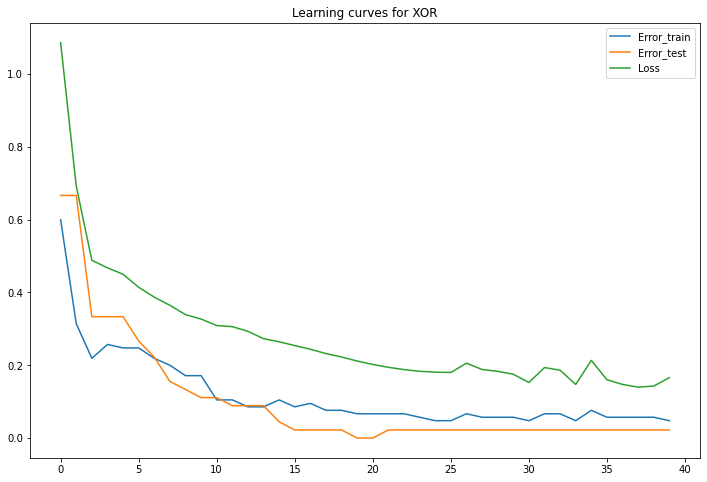

In [33]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 40

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Model 3 z jedną warstwą spisał się najlepiej, między modelem 1 i 2 nie było dużej różnicy.

## Analiza w zależności od learning_rate

### XOR:

learning_rate = 0.01

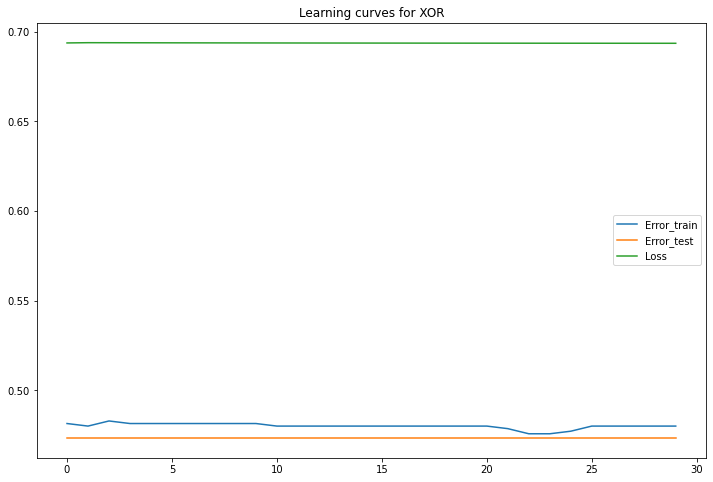

In [34]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), # 2 kolumny, 4 neurony, 4 neurony, 2 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(4, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 2)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.01
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_xor = torch.utils.data.DataLoader(np.array(xor_train), batch_size=1)
dataloader_test_xor = torch.utils.data.DataLoader(np.array(xor_test), batch_size=1)

num_iter = 30

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2] 
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2]
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for XOR")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

learning_rate = 0.05



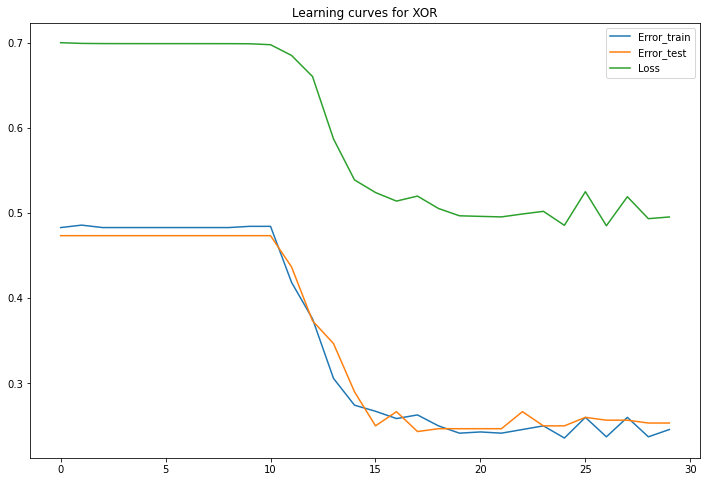

In [37]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), # 2 kolumny, 4 neurony, 4 neurony, 2 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(4, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 2)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_xor = torch.utils.data.DataLoader(np.array(xor_train), batch_size=1)
dataloader_test_xor = torch.utils.data.DataLoader(np.array(xor_test), batch_size=1)

num_iter = 30

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2] 
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2]
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for XOR")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

learning_rate = 0.3

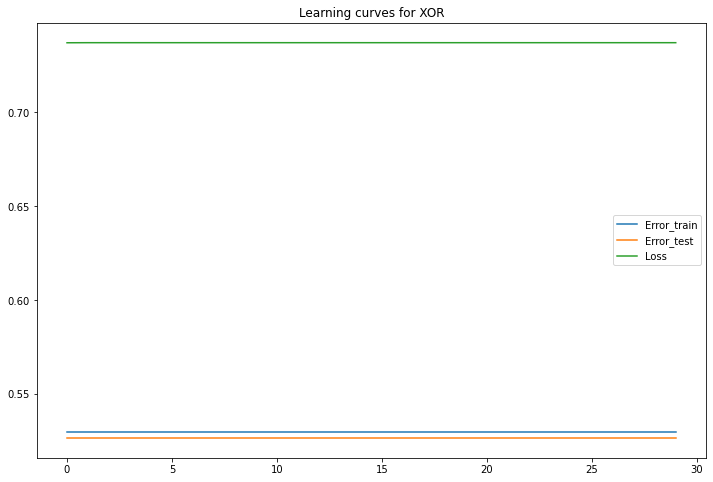

In [39]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 4), # 2 kolumny, 4 neurony, 4 neurony, 2 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(4, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 2)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.3
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_xor = torch.utils.data.DataLoader(np.array(xor_train), batch_size=1)
dataloader_test_xor = torch.utils.data.DataLoader(np.array(xor_test), batch_size=1)

num_iter = 30

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2] 
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2]
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for XOR")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

### IRIS:

learning_rate = 0.01



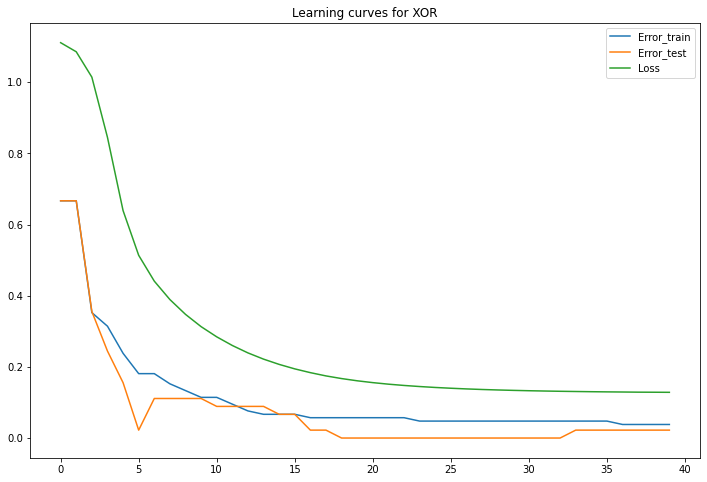

In [41]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.01
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 40

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

learning_rate = 0.05



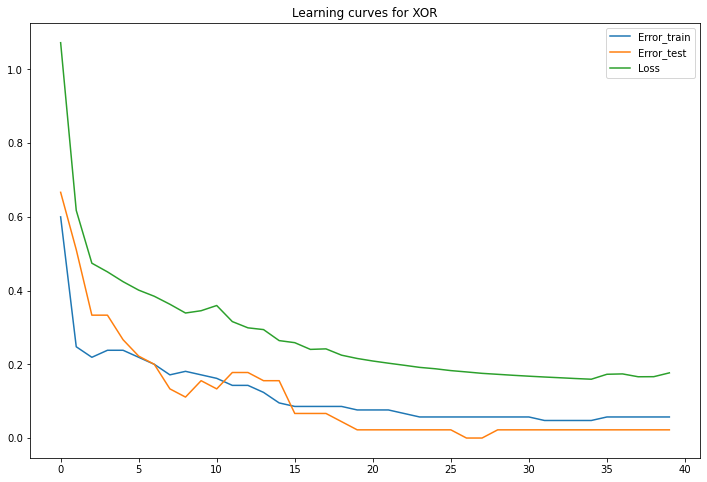

In [42]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 40

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

learning_rate = 0.3



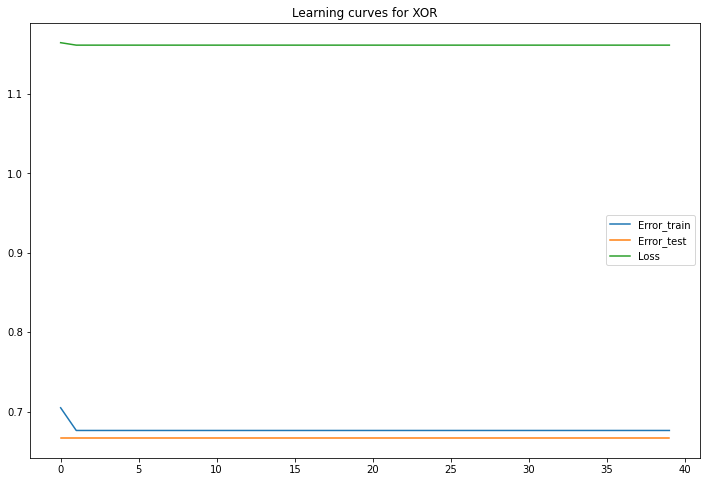

In [43]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.3
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 40

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

* Wniosek: Parametr learning_rate nie może być ani za duży, ani za mały 

## Analiza zjawiska przeuczenia na przykładzie IRIS

Liczba iteracji = 250, 1 warstwa

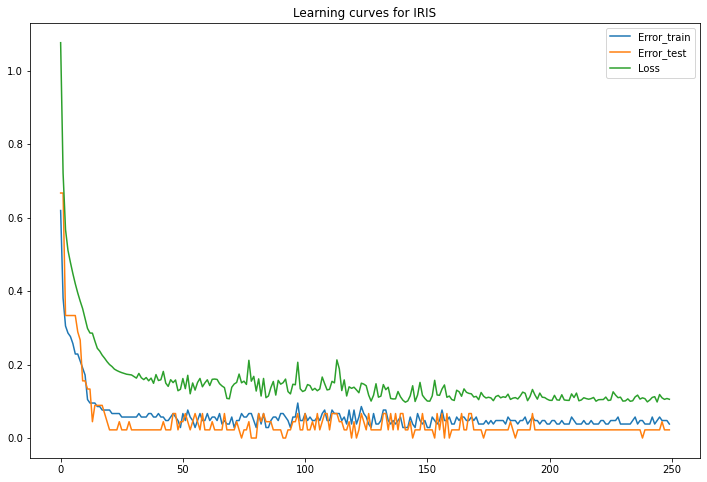

In [44]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 250

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Liczba iteracji = 500, 1 warstwa

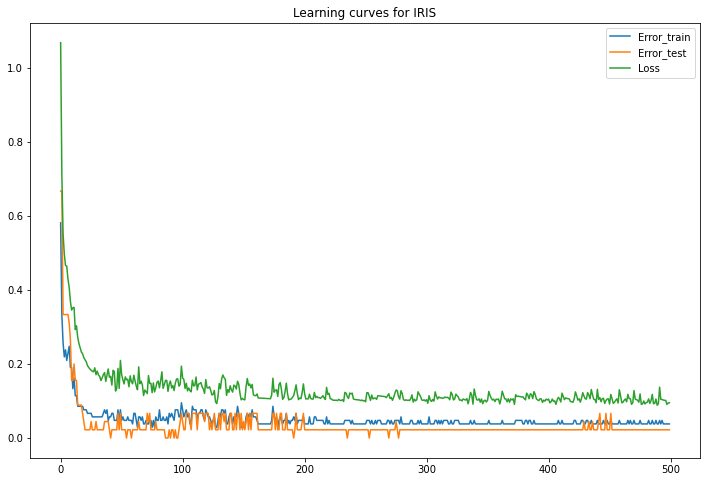

In [45]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 500

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

Liczba iteracji = 250, 2 warstwy

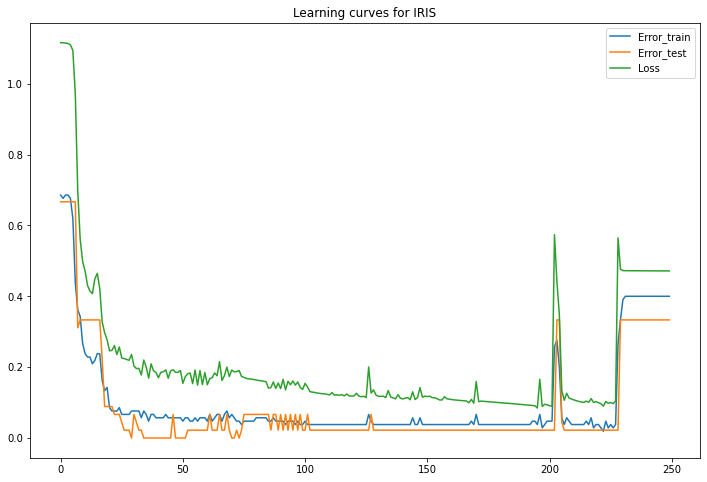

In [48]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 x 2 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 16),
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 250

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

* Wniosek: W przypadku jedno warstwowej struktury ciężko o przetrenowanie, natomiast w przypadku 2 warstw widzimy, że przy około 240 iteracji następuje zjawisko przeuczenia. Model zaczyna tracić predykcyjność przez zbytnie dopasowanie do zbioru treningowego.

## Wnioski XOR

Najlepszy zbudowany model dla XOR to model z 1 warstwą, 10 neuronów, learning_rate = 0.05, liczba iteracji = 20

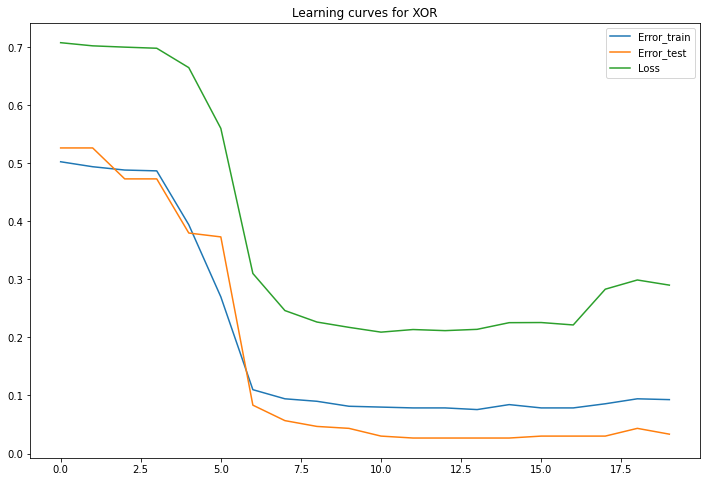

In [59]:
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10), # 2 kolumny, 10 neuronów, 2 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_xor = torch.utils.data.DataLoader(np.array(xor_train), batch_size=1)
dataloader_test_xor = torch.utils.data.DataLoader(np.array(xor_test), batch_size=1)

num_iter = 20

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2] 
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_xor:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 2]
            XX = XX[:,0:2]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for XOR")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

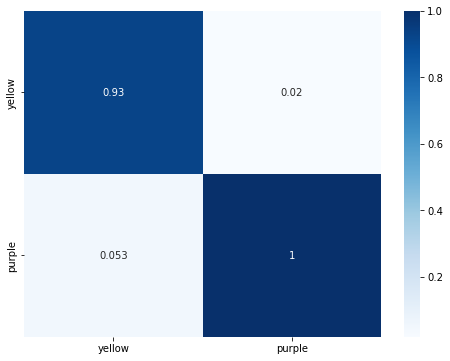

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
# https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7


y_pred = []
y_true = []

# iterate over test data
for XX in dataloader_test_xor:
        
        inputs, labels = XX[:,0:2], XX[:,2]
        
        output = net(inputs.float()) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('yellow','purple')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix)*2, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (8, 6))
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()

## Wnioski IRIS

Najlepszy zbudowany model dla IRIS to model z 1 warstwy, 16 neuronów, learning_rate = 0.05, liczba iteracji = 40

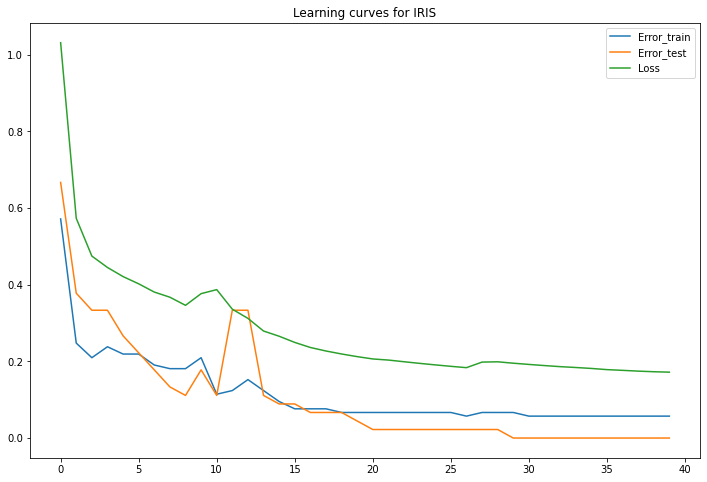

In [52]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 16), # 4 kolumny, 16 neuronów, 3 wyjścia
    torch.nn.ReLU(),
    torch.nn.Linear(16, 3)
   
)


def init_weights(m):
    if isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, std=0.01)
#wagi
net.apply(init_weights)

learning_rate = 0.05
loss = torch.nn.CrossEntropyLoss(reduction='none')
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # Stochastic Gradient Descent


dataloader_train_iris = torch.utils.data.DataLoader(np.array(iris_train), batch_size=1)
dataloader_test_iris = torch.utils.data.DataLoader(np.array(iris_test), batch_size=1)

num_iter = 40

losses = []
errors_train = []
errors_test = []
for epoch in range(num_iter):
        losses_iter = []
        errors_train_iter = []
        errors_test_iter = []

        for XX in dataloader_test_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4] 
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_test_iter += [(y != y_hat.argmax(1)).float().mean().item()]

        for XX in dataloader_train_iris:
            XX = torch.as_tensor(XX, dtype=torch.float32)
            y = XX[:, 4]
            XX = XX[:,0:4]
            y_hat = net(XX)
            errors_train_iter += [(y != y_hat.argmax(1)).float().mean().item()]
            l = loss(y_hat, y.long())
            optimizer.zero_grad()
            l.mean().backward()
            losses_iter += [l.mean().item()]
            optimizer.step()

        errors_train += [np.mean(errors_train_iter)]
        errors_test += [np.mean(errors_test_iter)]
        losses += [np.mean(losses_iter)]
        
plt.figure(figsize=(12, 8))
plt.plot(range(num_iter), errors_train)
plt.plot(range(num_iter), errors_test)
plt.plot(range(num_iter), losses)
plt.title("Learning curves for IRIS")
plt.legend(['Error_train', 'Error_test', 'Loss'])
plt.show()

### Macierz konfuzji dla IRIS

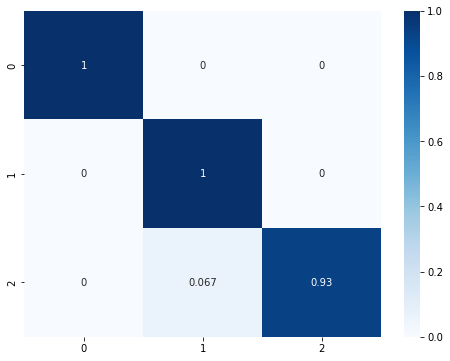

In [51]:
y_pred = []
y_true = []

# iterate over test data
for XX in dataloader_test_iris:
        
        inputs, labels = XX[:,0:4], XX[:,4]
        
        output = net(inputs.float()) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('0','1','2')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix)*3, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (8, 6))
sn.heatmap(df_cm, annot=True, cmap="Blues")
plt.show()